In [1]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
file_path='/content/drive/My Drive/sales_prediction.csv'

## Dataset Details

![](https://i.imgur.com/WlgNuFs.png)

In [3]:
import pandas as pd


In [4]:
df = pd.read_csv(file_path)
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


#Preparing Trainging & Test Data

In [5]:
X = df.drop(columns= ['Item_Outlet_Sales'])
y = df['Item_Outlet_Sales']

SEED=42

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=SEED)

X_train.shape, X_test.shape

((5966, 11), (2557, 11))

In [7]:
X_train.head(5)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
1921,FDN08,7.72,Regular,0.147904,Fruits and Vegetables,116.6466,OUT010,1998,NaN,Tier 3,Grocery Store
655,NCJ42,19.75,Low Fat,0.014301,Household,103.0332,OUT046,1997,Small,Tier 1,Supermarket Type1
2229,FDY47,NaN,Regular,0.054221,Breads,129.1310,OUT027,1985,Medium,Tier 3,Supermarket Type3
2537,FDN45,19.35,Low Fat,0.118342,Snack Foods,222.6088,OUT045,2002,NaN,Tier 2,Supermarket Type1
3528,FDY16,18.35,Regular,0.092150,Frozen Foods,184.8266,OUT013,1987,High,Tier 3,Supermarket Type1


In [8]:
y_train.head(5)

,Item_Outlet_Sales
1921,117.8466
655,1230.3984
2229,4933.5780
2537,1789.6704
3528,3872.9586


#Data Transformation & Analysis

In [9]:
#copying data
X_train_c = X_train.copy()
X_train_c

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
1921,FDN08,7.720,Regular,0.147904,Fruits and Vegetables,116.6466,OUT010,1998,NaN,Tier 3,Grocery Store
655,NCJ42,19.750,Low Fat,0.014301,Household,103.0332,OUT046,1997,Small,Tier 1,Supermarket Type1
2229,FDY47,NaN,Regular,0.054221,Breads,129.1310,OUT027,1985,Medium,Tier 3,Supermarket Type3
2537,FDN45,19.350,Low Fat,0.118342,Snack Foods,222.6088,OUT045,2002,NaN,Tier 2,Supermarket Type1
3528,FDY16,18.350,Regular,0.092150,Frozen Foods,184.8266,OUT013,1987,High,Tier 3,Supermarket Type1
...,...,...,...,...,...,...,...,...,...,...,...
5734,FDY08,9.395,Regular,0.286345,Fruits and Vegetables,139.1838,OUT010,1998,NaN,Tier 3,Grocery Store
5191,FDC41,15.600,Low Fat,0.117575,Frozen Foods,75.6670,OUT017,2007,NaN,Tier 2,Supermarket Type1
5390,NCQ53,17.600,Low Fat,0.018944,Health and Hygiene,237.3590,OUT045,2002,NaN,Tier 2,Supermarket Type1
860,FDL46,20.350,low fat,0.054363,Snack Foods,117.9466,OUT017,2007,NaN,Tier 2,Supermarket Type1


#EDA

In [10]:
X_train_c.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5966 entries, 1921 to 7270
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5966 non-null   object 
 1   Item_Weight                4943 non-null   float64
 2   Item_Fat_Content           5966 non-null   object 
 3   Item_Visibility            5966 non-null   float64
 4   Item_Type                  5966 non-null   object 
 5   Item_MRP                   5966 non-null   float64
 6   Outlet_Identifier          5966 non-null   object 
 7   Outlet_Establishment_Year  5966 non-null   int64  
 8   Outlet_Size                4276 non-null   object 
 9   Outlet_Location_Type       5966 non-null   object 
 10  Outlet_Type                5966 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 559.3+ KB


In [11]:
X_train_c.isnull()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
1921,False,False,False,False,False,False,False,False,True,False,False
655,False,False,False,False,False,False,False,False,False,False,False
2229,False,True,False,False,False,False,False,False,False,False,False
2537,False,False,False,False,False,False,False,False,True,False,False
3528,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
5734,False,False,False,False,False,False,False,False,True,False,False
5191,False,False,False,False,False,False,False,False,True,False,False
5390,False,False,False,False,False,False,False,False,True,False,False
860,False,False,False,False,False,False,False,False,True,False,False


In [12]:
X_train_c.isnull().sum()

,0
Item_Identifier,0
Item_Weight,1023
Item_Fat_Content,0
Item_Visibility,0
Item_Type,0
Item_MRP,0
Outlet_Identifier,0
Outlet_Establishment_Year,0
Outlet_Size,1690
Outlet_Location_Type,0


In [13]:
num_data = X_train_c.select_dtypes(exclude = ['object'])
num_data.head(10)

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
1921,7.720,0.147904,116.6466,1998
655,19.750,0.014301,103.0332,1997
2229,NaN,0.054221,129.1310,1985
2537,19.350,0.118342,222.6088,2002
3528,18.350,0.092150,184.8266,1987
6101,21.250,0.155695,177.6370,2002
2540,8.615,0.116152,94.1436,1987
3166,8.800,0.071370,209.1612,1987
7687,6.150,0.046262,97.8384,2004
2457,12.100,0.114874,221.4114,1997


In [14]:
#checking describe to see the basic stats about the dataframe
num_data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
count,4943.000000,5966.000000,5966.000000,5966.000000
mean,12.937193,0.065821,141.814242,1997.867248
std,4.630433,0.051093,62.627609,8.385023
min,4.555000,0.000000,31.290000,1985.000000
25%,8.895000,0.026982,94.144250,1987.000000
50%,12.650000,0.053923,143.879900,1999.000000
75%,17.000000,0.094350,186.621400,2004.000000
max,21.350000,0.328391,266.888400,2009.000000


In [15]:
num_data.isnull().sum()

,0
Item_Weight,1023
Item_Visibility,0
Item_MRP,0
Outlet_Establishment_Year,0


In [16]:
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

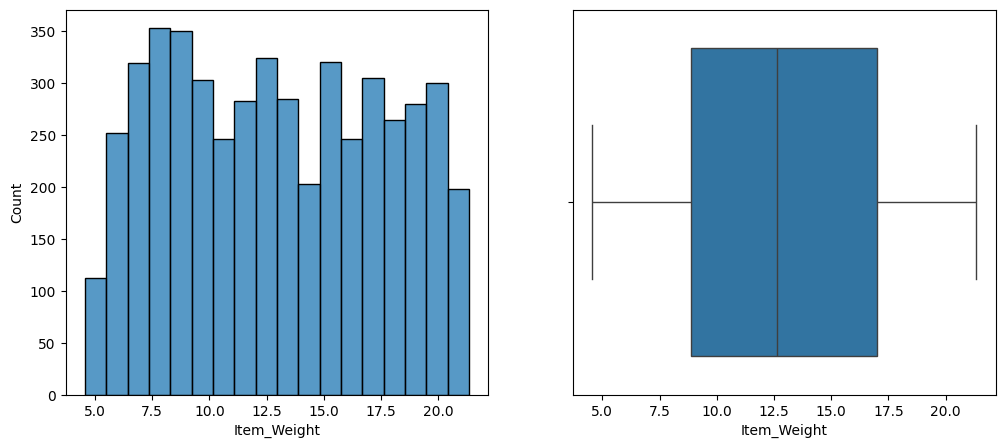

In [17]:
 fig, ax = plt.subplots (1,2, figsize=(12,5))

 sns.histplot(data=X_train_c, x='Item_Weight', ax=ax[0])
 sns.boxplot(data=X_train_c, x='Item_Weight', ax=ax[1])

 plt.show()

In [18]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Create subplots with 1 row and 2 columns
fig = make_subplots(rows=1, cols=2, subplot_titles=('Item Weight Distribution (Histogram)', 'Item Weight Distribution (Boxplot)'))

# Histogram in the first subplot
fig.add_trace(
    go.Histogram(x=X_train_c['Item_Weight'], name='Histogram'),
    row=1, col=1
)

# Boxplot in the second subplot
fig.add_trace(
    go.Box(x=X_train_c['Item_Weight'], name='Boxplot'),
    row=1, col=2
)

# Update layout
fig.update_layout(title_text='Item Weight Distribution: Histogram and Boxplot', width=900, height=400)

# Show the plot
fig.show()


In [19]:
def visualize_numeric_feature(data_frame, col_name):
  fig, ax = plt.subplots(1,2, figsize=(12,5))

  sns.histplot(data=data_frame, x=col_name, ax=ax[0]);
  sns.boxplot(data=data_frame, y=col_name, ax=ax[1]);

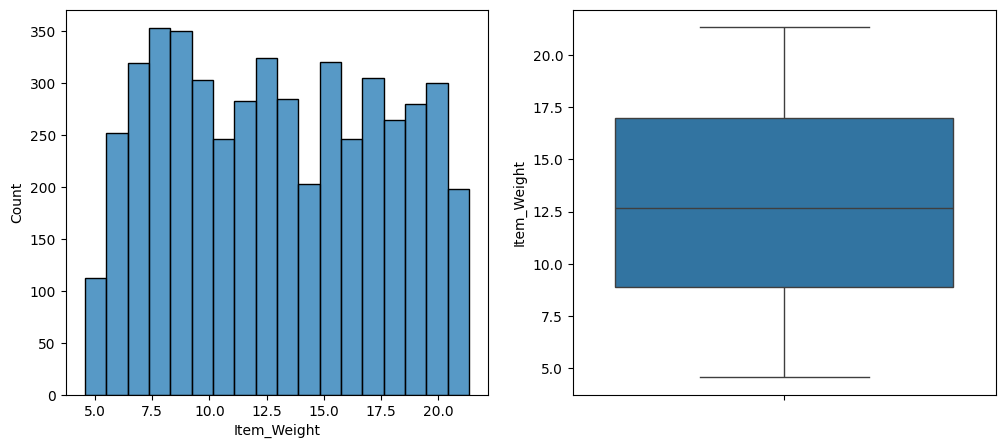

In [20]:
visualize_numeric_feature(X_train_c, 'Item_Weight')

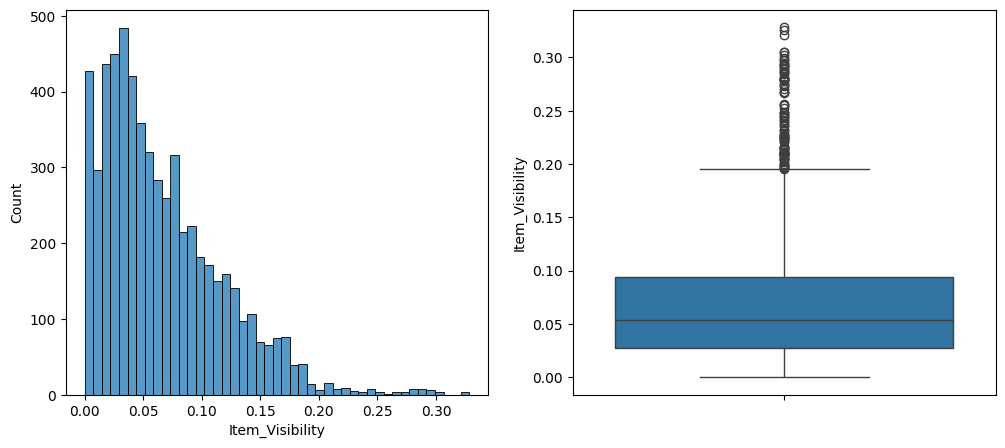

In [21]:
visualize_numeric_feature(X_train_c, 'Item_Visibility')

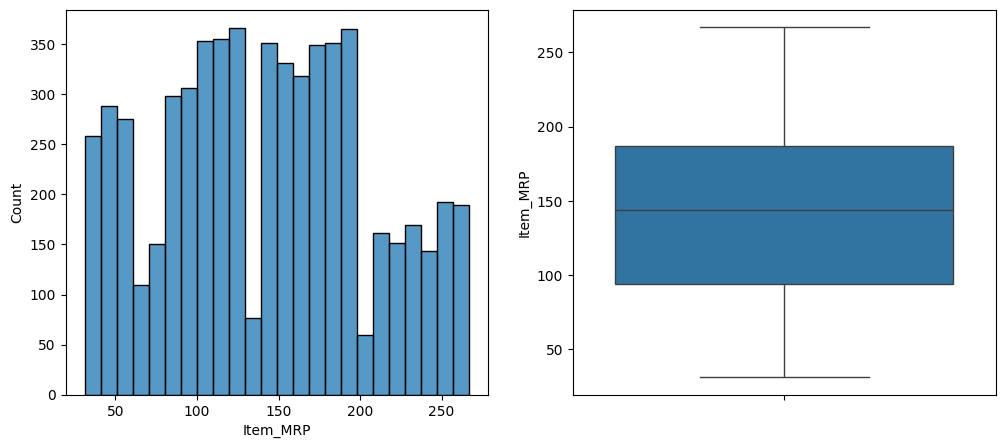

In [22]:
visualize_numeric_feature(X_train_c, 'Item_MRP')

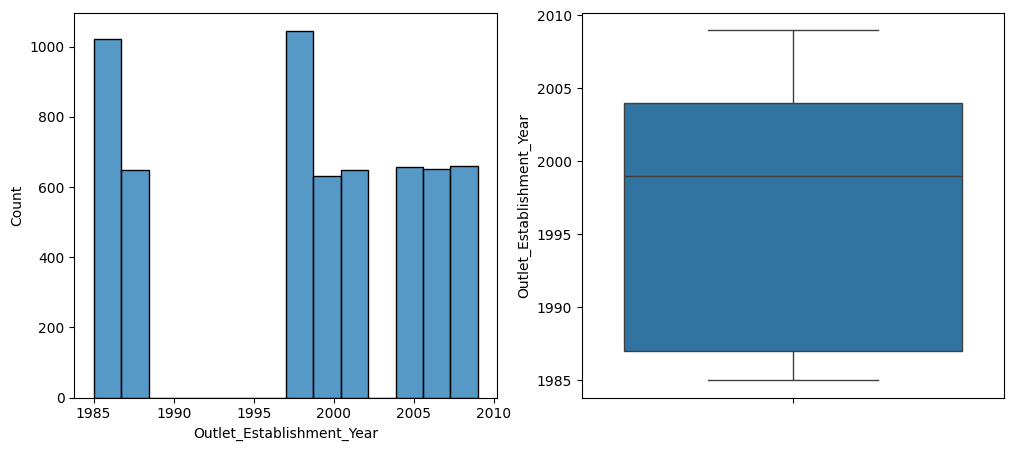

In [23]:
visualize_numeric_feature(X_train_c, 'Outlet_Establishment_Year')

<Axes: xlabel='Outlet_Establishment_Year', ylabel='count'>

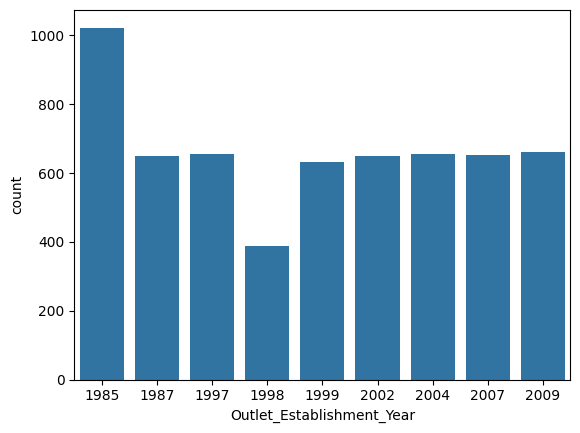

In [24]:
sns.countplot(data=X_train_c, x='Outlet_Establishment_Year')

In [25]:
#chosing datatype which has attribute of object
cat_features = X_train_c.select_dtypes(include=['object'])
cat_features.head()


,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
1921,FDN08,Regular,Fruits and Vegetables,OUT010,NaN,Tier 3,Grocery Store
655,NCJ42,Low Fat,Household,OUT046,Small,Tier 1,Supermarket Type1
2229,FDY47,Regular,Breads,OUT027,Medium,Tier 3,Supermarket Type3
2537,FDN45,Low Fat,Snack Foods,OUT045,NaN,Tier 2,Supermarket Type1
3528,FDY16,Regular,Frozen Foods,OUT013,High,Tier 3,Supermarket Type1


In [26]:
#for some basic stats
cat_features.describe()

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
count,5966,5966,5966,5966,4276,5966,5966
unique,1543,5,16,10,3,3,4
top,NCI54,Low Fat,Fruits and Vegetables,OUT027,Medium,Tier 3,Supermarket Type1
freq,9,3535,905,668,1960,2367,3893


In [27]:
#to check the null values
cat_features.isnull().sum()

,0
Item_Identifier,0
Item_Fat_Content,0
Item_Type,0
Outlet_Identifier,0
Outlet_Size,1690
Outlet_Location_Type,0
Outlet_Type,0


In [28]:
cat_features['Item_Identifier'].value_counts()

,count
Item_Identifier,
NCI54,9
FDF52,9
FDV60,8
FDT07,8
NCB18,8
...,...
FDT47,1
NCW42,1
DRH59,1


In [29]:
cat_features['Item_Fat_Content'].value_counts()

,count
Item_Fat_Content,
Low Fat,3535
Regular,2027
LF,243
low fat,82
reg,79


In [30]:
cat_features['Item_Type'].value_counts()

,count
Item_Type,
Fruits and Vegetables,905
Snack Foods,835
Household,648
Frozen Foods,591
Dairy,474
Canned,450
Baking Goods,438
Health and Hygiene,365
Soft Drinks,305


In [31]:
cat_features['Outlet_Identifier'].value_counts()

,count
Outlet_Identifier,
OUT027,668
OUT018,661
OUT046,656
OUT035,656
OUT017,652
OUT045,649
OUT013,649
OUT049,631
OUT010,389


In [32]:
cat_features['Outlet_Size'].value_counts()

,count
Outlet_Size,
Medium,1960
Small,1667
High,649


In [33]:
cat_features['Outlet_Location_Type'].value_counts()

,count
Outlet_Location_Type,
Tier 3,2367
Tier 2,1957
Tier 1,1642


In [34]:
cat_features['Outlet_Type'].value_counts()

,count
Outlet_Type,
Supermarket Type1,3893
Grocery Store,744
Supermarket Type3,668
Supermarket Type2,661


#Data Wrangling + Feature Engineering

Create High Level Item Types

In [35]:
X_train_c['Item_Identifier']

,Item_Identifier
1921,FDN08
655,NCJ42
2229,FDY47
2537,FDN45
3528,FDY16
...,...
5734,FDY08
5191,FDC41
5390,NCQ53
860,FDL46


In [36]:
X_train_c['Item_Identifier'].apply(lambda x: x[:2])

,Item_Identifier
1921,FD
655,NC
2229,FD
2537,FD
3528,FD
...,...
5734,FD
5191,FD
5390,NC
860,FD


In [37]:
X_train_c['Item_Identifier'].apply(lambda x: x[:2]).value_counts()

,count
Item_Identifier,
FD,4269
NC,1137
DR,560


In [38]:
X_train_c['Item_Identifier'].str[:2]

,Item_Identifier
1921,FD
655,NC
2229,FD
2537,FD
3528,FD
...,...
5734,FD
5191,FD
5390,NC
860,FD


In [39]:
X_train_c['Item_Identifier'].str[:2].value_counts()

,count
Item_Identifier,
FD,4269
NC,1137
DR,560


# Mapping the Item ID to Item Types

In [40]:
def create_item_type(data_frame):
  data_frame['Item_Type']= data_frame['Item_Identifier'].str[0:2]
  data_frame['Item_Type']= data_frame['Item_Type'].str[0:2].map({
      'FD': 'Food',
      'NC': 'Non-Consumable',
      'DR': 'Drinks'
  })
  return data_frame
  data_frame.head()


In [41]:
X_train_c = create_item_type(X_train_c)
X_train_c.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
1921,FDN08,7.72,Regular,0.147904,Food,116.6466,OUT010,1998,NaN,Tier 3,Grocery Store
655,NCJ42,19.75,Low Fat,0.014301,Non-Consumable,103.0332,OUT046,1997,Small,Tier 1,Supermarket Type1
2229,FDY47,NaN,Regular,0.054221,Food,129.1310,OUT027,1985,Medium,Tier 3,Supermarket Type3
2537,FDN45,19.35,Low Fat,0.118342,Food,222.6088,OUT045,2002,NaN,Tier 2,Supermarket Type1
3528,FDY16,18.35,Regular,0.092150,Food,184.8266,OUT013,1987,High,Tier 3,Supermarket Type1


#Filling in the missing values

In [42]:
X_train_c.isnull().sum()


,0
Item_Identifier,0
Item_Weight,1023
Item_Fat_Content,0
Item_Visibility,0
Item_Type,0
Item_MRP,0
Outlet_Identifier,0
Outlet_Establishment_Year,0
Outlet_Size,1690
Outlet_Location_Type,0


In [43]:
X_train_c[['Item_Identifier', 'Item_Weight']].drop_duplicates().sort_values(by=['Item_Identifier'])

,Item_Identifier,Item_Weight
1245,DRA12,11.60
4900,DRA24,19.35
6057,DRA59,NaN
1876,DRA59,8.27
3733,DRB01,NaN
...,...,...
411,NCZ42,10.50
2084,NCZ53,NaN
6879,NCZ53,9.60
7926,NCZ54,14.65


#Fill in missing values for Item_Weight

In [44]:


# Step 1: Fill missing Item_Weight using Item ID mapping
# Step 2: If Item ID is new, fill missing weight with median by item type


# Create a pivot table to map Item Identifier to Item Weight
ITEM_ID_WEIGHT_PIVOT = X_train_c.pivot_table(values='Item_Weight', index='Item_Identifier').reset_index()

# Create a dictionary mapping Item Identifiers to Item Weights using the pivot table
ITEM_ID_WEIGHT_MAPPING = dict(zip(ITEM_ID_WEIGHT_PIVOT['Item_Identifier'], ITEM_ID_WEIGHT_PIVOT['Item_Weight']))

# Display the first 10 mappings from the dictionary for verification
list(ITEM_ID_WEIGHT_MAPPING.items())[:10]


[('DRA12', 11.6),
 ('DRA24', 19.35),
 ('DRA59', 8.27),
 ('DRB01', 7.39),
 ('DRB13', 6.115),
 ('DRB24', 8.785),
 ('DRB25', 12.300000000000002),
 ('DRB48', 16.75),
 ('DRC01', 5.92),
 ('DRC12', 17.85)]

In [45]:
# Create a pivot table for mapping
ITEM_TYPE_WEIGHT_PIVOT = X_train_c.pivot_table(values='Item_Weight', index='Item_Type', aggfunc='median').reset_index()

# Create a dictionary mapping Item Type to median
ITEM_TYPE_WEIGHT_MAPPING = dict(zip(ITEM_TYPE_WEIGHT_PIVOT['Item_Type'], ITEM_TYPE_WEIGHT_PIVOT['Item_Weight']))

# Display the mapping of Item Type to median Item Weight
ITEM_TYPE_WEIGHT_MAPPING.items()


dict_items([('Drinks', 11.8), ('Food', 12.8), ('Non-Consumable', 13.05)])

In [46]:
def impute_item_weight(data_frame):
    # Fill missing weights by Item Identifier
    data_frame.loc[:, 'Item_Weight'] = data_frame.loc[:, 'Item_Identifier'].map(ITEM_ID_WEIGHT_MAPPING).fillna(data_frame.loc[:, 'Item_Weight'])

    # Fill remaining missing weights by Item Type
    data_frame.loc[:, 'Item_Weight'] = data_frame.loc[:, 'Item_Type'].map(ITEM_TYPE_WEIGHT_MAPPING).fillna(data_frame.loc[:, 'Item_Weight'])

    return data_frame


In [47]:
X_train_c = impute_item_weight (X_train_c)

In [48]:
X_train_c.isnull().sum()

,0
Item_Identifier,0
Item_Weight,0
Item_Fat_Content,0
Item_Visibility,0
Item_Type,0
Item_MRP,0
Outlet_Identifier,0
Outlet_Establishment_Year,0
Outlet_Size,1690
Outlet_Location_Type,0


In [49]:
X_train_c.groupby(by=['Outlet_Type' , 'Outlet_Size']).size()

Outlet_Type        Outlet_Size
Grocery Store      Small           355
Supermarket Type1  High            649
                   Medium          631
                   Small          1312
Supermarket Type2  Medium          661
Supermarket Type3  Medium          668
dtype: int64

In [50]:
X_train_c.pivot_table(values='Outlet_Size', index='Outlet_Type', aggfunc=lambda x: x.mode()[0]).reset_index()

,Outlet_Type,Outlet_Size
0,Grocery Store,Small
1,Supermarket Type1,Small
2,Supermarket Type2,Medium
3,Supermarket Type3,Medium


In [51]:
# Fill missing Outlet_Size based on Outlet_Type
OUTLET_TYPE_SIZE_PIVOT = X_train_c.pivot_table(values='Outlet_Size', index='Outlet_Type',
                                               aggfunc=lambda x: x.mode()[0]).reset_index()

# Create mapping for Outlet_Type and Outlet_Size
OUTLET_TYPE_SIZE_MAPPING = dict(zip(OUTLET_TYPE_SIZE_PIVOT['Outlet_Type'], OUTLET_TYPE_SIZE_PIVOT['Outlet_Size']))

# Access the mapping
OUTLET_TYPE_SIZE_MAPPING.items()


dict_items([('Grocery Store', 'Small'), ('Supermarket Type1', 'Small'), ('Supermarket Type2', 'Medium'), ('Supermarket Type3', 'Medium')])

In [52]:
def impute_outlet_size(data_frame):
    # Fill missing Outlet_Size based on Outlet_Type mapping
    data_frame.loc[:, 'Outlet_Size'] = data_frame.loc[:, 'Outlet_Size'].fillna(data_frame.loc[:, 'Outlet_Type'].map(OUTLET_TYPE_SIZE_MAPPING))

    return data_frame


In [53]:
X_train_c = impute_outlet_size(X_train_c)

In [54]:
X_train_c.isnull().sum()

,0
Item_Identifier,0
Item_Weight,0
Item_Fat_Content,0
Item_Visibility,0
Item_Type,0
Item_MRP,0
Outlet_Identifier,0
Outlet_Establishment_Year,0
Outlet_Size,0
Outlet_Location_Type,0



#Standardize Item Fat Content Category

In [55]:
X_train_c['Item_Fat_Content'].value_counts()

,count
Item_Fat_Content,
Low Fat,3535
Regular,2027
LF,243
low fat,82
reg,79


In [56]:
def standardize_item_fat_content(data_frame):
  data_frame['Item_Fat_Content'] = data_frame['Item_Fat_Content'].replace({
      'LF': 'Low_Fat',
      'low fat': 'Low_Fat',
      'Low Fat': 'Low_Fat',
      'reg': 'Regular'
  })
  return data_frame

In [57]:
X_train_c = standardize_item_fat_content(X_train_c)
X_train_c['Item_Fat_Content'].value_counts()

,count
Item_Fat_Content,
Low_Fat,3860
Regular,2106


#Correct Iteam Fat Content For Non Consumables

In [58]:
X_train_c.groupby(by=['Item_Type' , 'Item_Fat_Content']).size()

Item_Type       Item_Fat_Content
Drinks          Low_Fat              517
                Regular               43
Food            Low_Fat             2206
                Regular             2063
Non-Consumable  Low_Fat             1137
dtype: int64

In [59]:
X_train_c.loc[X_train_c['Item_Type'] == 'Non-Consumable', 'Item_Fat_Content']

,Item_Fat_Content
655,Low_Fat
4423,Low_Fat
907,Low_Fat
7021,Low_Fat
6074,Low_Fat
...,...
8322,Low_Fat
466,Low_Fat
6265,Low_Fat
5390,Low_Fat


In [60]:
def correct_item_fat_content (data_frame):
  data_frame.loc[data_frame['Item_Type'] == 'Non-Consumable', 'Item_Fat_Content'] = 'Non-Edible'
  return data_frame

In [61]:
X_train_c = correct_item_fat_content (X_train_c)
X_train_c.groupby(by=['Item_Type' , 'Item_Fat_Content']).size()

Item_Type       Item_Fat_Content
Drinks          Low_Fat              517
                Regular               43
Food            Low_Fat             2206
                Regular             2063
Non-Consumable  Non-Edible          1137
dtype: int64

In [62]:
X_train_c.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
1921,FDN08,12.80,Regular,0.147904,Food,116.6466,OUT010,1998,Small,Tier 3,Grocery Store
655,NCJ42,13.05,Non-Edible,0.014301,Non-Consumable,103.0332,OUT046,1997,Small,Tier 1,Supermarket Type1
2229,FDY47,12.80,Regular,0.054221,Food,129.1310,OUT027,1985,Medium,Tier 3,Supermarket Type3
2537,FDN45,12.80,Low_Fat,0.118342,Food,222.6088,OUT045,2002,Small,Tier 2,Supermarket Type1
3528,FDY16,12.80,Regular,0.092150,Food,184.8266,OUT013,1987,High,Tier 3,Supermarket Type1


In [63]:
X_train_c.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5966 entries, 1921 to 7270
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5966 non-null   object 
 1   Item_Weight                5966 non-null   float64
 2   Item_Fat_Content           5966 non-null   object 
 3   Item_Visibility            5966 non-null   float64
 4   Item_Type                  5966 non-null   object 
 5   Item_MRP                   5966 non-null   float64
 6   Outlet_Identifier          5966 non-null   object 
 7   Outlet_Establishment_Year  5966 non-null   int64  
 8   Outlet_Size                5966 non-null   object 
 9   Outlet_Location_Type       5966 non-null   object 
 10  Outlet_Type                5966 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 559.3+ KB


#Prepration of Data Set for Machine Learning

In [64]:
def prepare_dataset(data_frame):
  data_frame = create_item_type(data_frame)
  data_frame = impute_item_weight(data_frame)
  data_frame = impute_outlet_size(data_frame)
  data_frame = standardize_item_fat_content(data_frame)
  data_frame = correct_item_fat_content(data_frame)
  return data_frame


In [65]:
X_train.isnull().sum()

,0
Item_Identifier,0
Item_Weight,1023
Item_Fat_Content,0
Item_Visibility,0
Item_Type,0
Item_MRP,0
Outlet_Identifier,0
Outlet_Establishment_Year,0
Outlet_Size,1690
Outlet_Location_Type,0


In [66]:
X_train = prepare_dataset(X_train)
X_train.isnull().sum()

,0
Item_Identifier,0
Item_Weight,0
Item_Fat_Content,0
Item_Visibility,0
Item_Type,0
Item_MRP,0
Outlet_Identifier,0
Outlet_Establishment_Year,0
Outlet_Size,0
Outlet_Location_Type,0


In [67]:
X_test.isnull().sum()

,0
Item_Identifier,0
Item_Weight,440
Item_Fat_Content,0
Item_Visibility,0
Item_Type,0
Item_MRP,0
Outlet_Identifier,0
Outlet_Establishment_Year,0
Outlet_Size,720
Outlet_Location_Type,0


In [68]:
X_test = prepare_dataset(X_test)
X_test.isnull().sum()

,0
Item_Identifier,0
Item_Weight,0
Item_Fat_Content,0
Item_Visibility,0
Item_Type,0
Item_MRP,0
Outlet_Identifier,0
Outlet_Establishment_Year,0
Outlet_Size,0
Outlet_Location_Type,0


#Handling Categorical Data

**All Categorical Columns **

In [69]:
cat_feats = X_train.select_dtypes(include=['object'])
cat_feats.head()

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
1921,FDN08,Regular,Food,OUT010,Small,Tier 3,Grocery Store
655,NCJ42,Non-Edible,Non-Consumable,OUT046,Small,Tier 1,Supermarket Type1
2229,FDY47,Regular,Food,OUT027,Medium,Tier 3,Supermarket Type3
2537,FDN45,Low_Fat,Food,OUT045,Small,Tier 2,Supermarket Type1
3528,FDY16,Regular,Food,OUT013,High,Tier 3,Supermarket Type1


In [70]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(handle_unknown='ignore')
ohe.fit(cat_feats)

OneHotEncoder(handle_unknown='ignore')

In [71]:
ohe_feature_names = ohe.get_feature_names_out(input_features=cat_feats.columns)
ohe_feature_names

array(['Item_Identifier_DRA12', 'Item_Identifier_DRA24',
       'Item_Identifier_DRA59', ..., 'Outlet_Type_Supermarket Type1',
       'Outlet_Type_Supermarket Type2', 'Outlet_Type_Supermarket Type3'],
      dtype=object)

In [72]:
num_feats_train = X_train.select_dtypes(exclude=['object']).reset_index(drop=True)
num_feats_train.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
0,12.80,0.147904,116.6466,1998
1,13.05,0.014301,103.0332,1997
2,12.80,0.054221,129.1310,1985
3,12.80,0.118342,222.6088,2002
4,12.80,0.092150,184.8266,1987


In [73]:
cat_feats_train = X_train.select_dtypes(include=['object'])
X_train_cat_one = pd.DataFrame(ohe.transform(cat_feats_train).toarray(), columns=ohe_feature_names)
X_train_cat_one.head()

,Item_Identifier_DRA12,Item_Identifier_DRA24,Item_Identifier_DRA59,Item_Identifier_DRB01,Item_Identifier_DRB13,Item_Identifier_DRB24,Item_Identifier_DRB25,Item_Identifier_DRB48,Item_Identifier_DRC01,Item_Identifier_DRC12,...,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


In [74]:
X_train_final = pd.concat([num_feats_train, X_train_cat_one], axis=1)
X_train_final.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Identifier_DRA12,Item_Identifier_DRA24,Item_Identifier_DRA59,Item_Identifier_DRB01,Item_Identifier_DRB13,Item_Identifier_DRB24,...,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,12.80,0.147904,116.6466,1998,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
1,13.05,0.014301,103.0332,1997,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,12.80,0.054221,129.1310,1985,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,12.80,0.118342,222.6088,2002,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,12.80,0.092150,184.8266,1987,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


In [75]:
final_columns = X_train_final.columns.values
final_columns

array(['Item_Weight', 'Item_Visibility', 'Item_MRP', ...,
       'Outlet_Type_Supermarket Type1', 'Outlet_Type_Supermarket Type2',
       'Outlet_Type_Supermarket Type3'], dtype=object)

In [76]:
num_feats_test = X_test.select_dtypes(exclude=['object']).reset_index(drop=True)
cat_feats_test = X_test.select_dtypes(include=['object'])
X_test_cat_ohe = pd.DataFrame(ohe.transform(cat_feats_test).toarray(), columns=ohe_feature_names)
X_test_final = pd.concat([num_feats_test, X_test_cat_ohe], axis = 1)
X_test_final = X_test_final[final_columns]

X_test_final.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Identifier_DRA12,Item_Identifier_DRA24,Item_Identifier_DRA59,Item_Identifier_DRB01,Item_Identifier_DRB13,Item_Identifier_DRB24,...,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,12.80,0.026300,79.4302,1987,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,13.05,0.071136,42.7086,1997,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,12.80,0.041313,42.0454,1999,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,11.80,0.044767,173.7054,1985,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,12.80,0.012456,197.5110,2004,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


#Start Modeling


#1

<Axes: xlabel='Item_Outlet_Sales', ylabel='Count'>

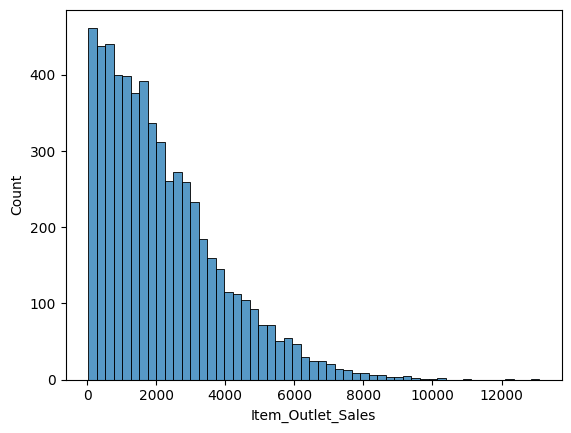

In [77]:
sns.histplot(y_train)

In [78]:
import plotly.express as px

# Assuming y_train is a list or numpy array
fig = px.histogram(y_train, nbins=30)  # You can adjust nbins based on your preference
fig.show()


In [79]:
pip install dask

In [80]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, HistGradientBoostingRegressor
import xgboost as xgb
from lightgbm import LGBMRegressor
from sklearn.model_selection import cross_validate
import numpy as np



/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning:


Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.




In [81]:
from sklearn.model_selection import cross_validate
import numpy as np

def train_and_eval_model(model, X_train, y_train, cv=5):
    # Perform cross-validation with R^2 and RMSE as metrics
    cv_results = cross_validate(model, X_train, y_train, cv=cv, scoring=('r2', 'neg_root_mean_squared_error'))

    # R^2 scores
    print('Model:', model)
    r2_scores = cv_results['test_r2']
    print('R2 CV scores:', r2_scores)
    print('R2 CV scores mean / stdev:', np.mean(r2_scores), '/', np.std(r2_scores))

    # RMSE scores
    rmse_scores = cv_results['test_neg_root_mean_squared_error']
    rmse_scores = [-1 * score for score in rmse_scores]  # Convert negative RMSE to positive values
    print('RMSE CV scores:', rmse_scores)
    print('RMSE CV scores mean / stdev:', np.mean(rmse_scores), '/', np.std(rmse_scores))


In [82]:
rf = RandomForestRegressor(random_state=SEED)
train_and_eval_model(model=rf, X_train = X_train_final, y_train=y_train)

Model: RandomForestRegressor(random_state=42)
R2 CV scores: [0.57421004 0.5314905  0.54524043 0.55787979 0.52194449]
R2 CV scores mean / stdev: 0.546153049997137 / 0.018582729530472342
RMSE CV scores: [1099.425623627879, 1162.6854097818962, 1177.4634596495841, 1149.6821988704528, 1199.8679569528917]
RMSE CV scores mean / stdev: 1157.8249297765408 / 33.62646362870274


In [83]:
gb = GradientBoostingRegressor(random_state=SEED)
train_and_eval_model(model=gb, X_train = X_train_final, y_train=y_train)

Model: GradientBoostingRegressor(random_state=42)
R2 CV scores: [0.60573036 0.5923607  0.5758711  0.60626459 0.55080587]
R2 CV scores mean / stdev: 0.5862065239026031 / 0.020887353651922378
RMSE CV scores: [1057.9492007483004, 1084.5286925086336, 1137.1177712385027, 1084.9503408076773, 1163.0846587993938]
RMSE CV scores mean / stdev: 1105.5261328205015 / 38.571584651929534


In [84]:
hgb = HistGradientBoostingRegressor(random_state=SEED)
train_and_eval_model(model=hgb, X_train = X_train_final, y_train=y_train)

Model: HistGradientBoostingRegressor(random_state=42)
R2 CV scores: [0.58761743 0.54263043 0.55156699 0.58829732 0.56008386]
R2 CV scores mean / stdev: 0.5660392060735371 / 0.018729256474493094
RMSE CV scores: [1081.9776679958823, 1148.7794441893457, 1169.2444055992262, 1109.4288961928753, 1151.010370790897]
RMSE CV scores mean / stdev: 1132.0881569536455 / 31.754493418444664


In [85]:
xgr = xgb.XGBRegressor(objective='reg:squarederror', random_state=SEED)
train_and_eval_model(model=xgr, X_train = X_train_final, y_train=y_train)

Model: XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)
R2 CV scores: [0.58628394 0.56191253 0.55090635 0.58254102 0.53819283]
R2 CV scores mean / stdev: 0.5639673344190113 / 0.01834202200582079
RMSE CV scores: [1083.725618242536, 1124.3031749369763, 1170.1053648200668, 1117.1578164510047, 1179.30088317

In [86]:
lgbr = LGBMRegressor(random_state=SEED)
train_and_eval_model(model=lgbr, X_train = X_train_final, y_train=y_train)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000899 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 576
[LightGBM] [Info] Number of data points in the train set: 4772, number of used features: 30
[LightGBM] [Info] Start training from score 2221.272740
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000519 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 576
[LightGBM] [Info] Number of data points in the train set: 4773, number of used features: 30
[LightGBM] [Info] Start training from score 2213.452868
[LightGBM] [Warning] Found

#Handling Categorical Data

2- All Categorical Columns - Native Handling

In [87]:
X_train_copy = X_train.copy().drop(columns='Item_Identifier')

cat_cols = X_train_copy.select_dtypes(include = ['object']).columns.tolist()
num_cols = cal_cols = X_train_copy.select_dtypes(exclude = ['object']).columns.tolist()

cat_cols, num_cols

(['Item_Fat_Content',
  'Item_Type',
  'Outlet_Identifier',
  'Outlet_Size',
  'Outlet_Location_Type',
  'Outlet_Type'],
 ['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Outlet_Establishment_Year'])

In [88]:
X_train_copy[cat_cols] = X_train_copy[cat_cols].astype('category')
n_categorical_features = len(cat_cols)
n_numerical_features = len(num_cols)
X_train_copy = X_train_copy [ cat_cols+num_cols]

X_train_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5966 entries, 1921 to 7270
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   Item_Fat_Content           5966 non-null   category
 1   Item_Type                  5966 non-null   category
 2   Outlet_Identifier          5966 non-null   category
 3   Outlet_Size                5966 non-null   category
 4   Outlet_Location_Type       5966 non-null   category
 5   Outlet_Type                5966 non-null   category
 6   Item_Weight                5966 non-null   float64 
 7   Item_Visibility            5966 non-null   float64 
 8   Item_MRP                   5966 non-null   float64 
 9   Outlet_Establishment_Year  5966 non-null   int64   
dtypes: category(6), float64(3), int64(1)
memory usage: 269.1 KB


In [89]:
categorical_mask = [True] * n_categorical_features + [False] * n_numerical_features
categorical_mask


[True, True, True, True, True, True, False, False, False, False]

In [90]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer
from sklearn.compose import make_column_selector

categorical_mask = [True] * n_categorical_features + [False] * n_numerical_features

ordinal_encoder = make_column_transformer(
    (
        OrdinalEncoder(handle_unknown="use_encoded_value", unknown_value=np.nan),
        make_column_selector(dtype_include="category")
    ),
    remainder="passthrough",
)

hgb = make_pipeline(
    ordinal_encoder,
    HistGradientBoostingRegressor(
        random_state=42, categorical_features=categorical_mask
    ),
)
train_and_eval_model(model=hgb, X_train = X_train_copy, y_train=y_train)

Model: Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=nan),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7c459879ca00>)])),
                ('histgradientboostingregressor',
                 HistGradientBoostingRegressor(categorical_features=[True, True,
                                                                     True, True,
                                                                     True, True,
                                                                     False,
                                                                     False,
                                                         

In [91]:
lgbr = LGBMRegressor(random_state=SEED)
train_and_eval_model(model=lgbr, X_train = X_train_copy, y_train=y_train)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000385 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 556
[LightGBM] [Info] Number of data points in the train set: 4772, number of used features: 10
[LightGBM] [Info] Start training from score 2221.272740
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000388 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 556
[LightGBM] [Info] Number of data points in the train set: 4773, number of used features: 10
[LightGBM] [Info] Start training from score 2213.452868
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000380 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not eno

#Hadeling Categorical Data

3- No Iteam Identifier - One Hot Encoded

In [92]:
cat_feats = X_train.select_dtypes(include=['object']).drop(columns=['Item_Identifier'])
ohe = OneHotEncoder ( handle_unknown = 'ignore')
ohe.fit(cat_feats)
ohe_feature_names = ohe.get_feature_names_out(input_features=cat_feats.columns)

In [93]:
num_feats_train = X_train.select_dtypes(exclude=['object']).reset_index(drop=True)
cat_feats_train = X_train.select_dtypes(include=['object']).drop(columns=['Item_Identifier'])
X_train_cat_ohe = pd.DataFrame(ohe.transform(cat_feats_train).toarray(), columns=ohe_feature_names)
X_train_final = pd.concat([num_feats_train, X_train_cat_ohe], axis =1)
X_train_final

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Fat_Content_Low_Fat,Item_Fat_Content_Non-Edible,Item_Fat_Content_Regular,Item_Type_Drinks,Item_Type_Food,Item_Type_Non-Consumable,...,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,12.80,0.147904,116.6466,1998,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
1,13.05,0.014301,103.0332,1997,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,12.80,0.054221,129.1310,1985,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,12.80,0.118342,222.6088,2002,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,12.80,0.092150,184.8266,1987,0.0,0.0,1.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5961,12.80,0.286345,139.1838,1998,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
5962,12.80,0.117575,75.6670,2007,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
5963,13.05,0.018944,237.3590,2002,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
5964,12.80,0.054363,117.9466,2007,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [94]:
X_train_final.shape

(5966, 30)

In [95]:
gb = GradientBoostingRegressor(random_state=SEED)
train_and_eval_model(model=gb, X_train=X_train_final, y_train=y_train)

Model: GradientBoostingRegressor(random_state=42)
R2 CV scores: [0.60180697 0.57855442 0.5815951  0.62777602 0.57511142]
R2 CV scores mean / stdev: 0.5929687850015635 / 0.019726514522084144
RMSE CV scores: [1063.2000196637885, 1102.7416380777577, 1129.4184934073926, 1054.896377224483, 1131.180263343315]
RMSE CV scores mean / stdev: 1096.2873583433473 / 32.139788287220554


In [96]:
hgb = HistGradientBoostingRegressor(random_state=SEED)
train_and_eval_model(model=hgb, X_train=X_train_final, y_train=y_train)

Model: HistGradientBoostingRegressor(random_state=42)
R2 CV scores: [0.58761743 0.54263043 0.55156699 0.58829732 0.56008386]
R2 CV scores mean / stdev: 0.5660392060735371 / 0.018729256474493094
RMSE CV scores: [1081.9776679958823, 1148.7794441893457, 1169.2444055992262, 1109.4288961928753, 1151.010370790897]
RMSE CV scores mean / stdev: 1132.0881569536455 / 31.754493418444664


In [97]:
xgr = xgb.XGBRegressor(objective='reg:squarederror', random_state=SEED)
train_and_eval_model(model=xgr, X_train=X_train_final, y_train=y_train)

Model: XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)
R2 CV scores: [0.51530374 0.46925475 0.46694152 0.49810759 0.48219275]
R2 CV scores mean / stdev: 0.48636007009278287 / 0.01823611229028383
RMSE CV scores: [1173.01342427842, 1237.5024844175512, 1274.805548247566, 1224.9346994781858, 1248.758195646

In [98]:
lgbr = LGBMRegressor(random_state=SEED)
train_and_eval_model(model=lgbr, X_train=X_train_final, y_train=y_train)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000511 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 576
[LightGBM] [Info] Number of data points in the train set: 4772, number of used features: 30
[LightGBM] [Info] Start training from score 2221.272740
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000418 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 576
[LightGBM] [Info] Number of data points in the train set: 4773, number of used features: 30
[LightGBM] [Info] Start training from score 2213.452868
[LightGBM] [Warning] Found

In [99]:
X_train.select_dtypes(include=['object']).drop(columns=['Item_Identifier']).head()

,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
1921,Regular,Food,OUT010,Small,Tier 3,Grocery Store
655,Non-Edible,Non-Consumable,OUT046,Small,Tier 1,Supermarket Type1
2229,Regular,Food,OUT027,Medium,Tier 3,Supermarket Type3
2537,Low_Fat,Food,OUT045,Small,Tier 2,Supermarket Type1
3528,Regular,Food,OUT013,High,Tier 3,Supermarket Type1


#Handling Categorical Data

4- Item Identifier = feature hashed, rest categorical - one hot encoded

In [100]:
X_train['Item_Identifier'].head()

,Item_Identifier
1921,FDN08
655,NCJ42
2229,FDY47
2537,FDN45
3528,FDY16


In [101]:
from sklearn.feature_extraction import FeatureHasher
import pandas as pd

# Specify the hash vector size
hash_vector_size = 50

# Create a FeatureHasher
fh = FeatureHasher(n_features=hash_vector_size, input_type='string')

# Ensure each entry is an iterable (e.g., list of characters or words)
# Here, we split each identifier into a list of characters
X_transformed = X_train['Item_Identifier'].apply(list)

# Transform the tokenized data with FeatureHasher
hashed_df = pd.DataFrame(fh.transform(X_transformed).toarray(),
                         columns=['H' + str(i) for i in range(hash_vector_size)])

# Display the hashed DataFrame
hashed_df.head()


,H0,H1,H2,H3,H4,H5,H6,H7,H8,H9,...,H40,H41,H42,H43,H44,H45,H46,H47,H48,H49
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,...,0.0,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,-1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [102]:
cat_feats = X_train.select_dtypes(include=['object']).drop(columns=['Item_Identifier'])
ohe = OneHotEncoder (handle_unknown = 'ignore')
ohe.fit(cat_feats)
ohe_feature_names = ohe.get_feature_names_out(input_features=cat_feats.columns)

In [103]:
num_feats_train = X_train.select_dtypes(exclude=['object']).reset_index(drop=True)
cat_feats_train = X_train.select_dtypes(include=['object']).drop(columns=['Item_Identifier'])
X_train_cat_ohe = pd.DataFrame(ohe.transform(cat_feats_train).toarray(), columns=ohe_feature_names)
X_train_final = pd.concat([num_feats_train, hashed_df, X_train_cat_ohe], axis =1)
X_train_final

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,H0,H1,H2,H3,H4,H5,...,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,12.80,0.147904,116.6466,1998,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
1,13.05,0.014301,103.0332,1997,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,12.80,0.054221,129.1310,1985,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,12.80,0.118342,222.6088,2002,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,12.80,0.092150,184.8266,1987,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5961,12.80,0.286345,139.1838,1998,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
5962,12.80,0.117575,75.6670,2007,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
5963,13.05,0.018944,237.3590,2002,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
5964,12.80,0.054363,117.9466,2007,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [104]:
X_train_final.shape

(5966, 80)

In [116]:
gb = GradientBoostingRegressor(random_state=SEED)
train_and_eval_model(model=gb, X_train = X_train_final, y_train=y_train)

Model: GradientBoostingRegressor(random_state=42)
R2 CV scores: [0.60633894 0.57829486 0.58150283 0.62945007 0.5741861 ]
R2 CV scores mean / stdev: 0.5939545574272913 / 0.020996990657864187
RMSE CV scores: [1057.1323761814676, 1103.0811701779787, 1129.5430297315024, 1052.5215453379426, 1132.4113368317096]
RMSE CV scores mean / stdev: 1094.9378916521202 / 34.34091173779901


In [106]:
xgr = HistGradientBoostingRegressor(random_state=SEED)
train_and_eval_model(model=xgr, X_train = X_train_final, y_train=y_train)

Model: HistGradientBoostingRegressor(random_state=42)
R2 CV scores: [0.5826823  0.54583434 0.54586003 0.59347034 0.56263347]
R2 CV scores mean / stdev: 0.5660960949800822 / 0.019269034059175214
RMSE CV scores: [1088.432624529752, 1144.7487226486053, 1176.6610580669833, 1102.4369032088005, 1147.670087958819]
RMSE CV scores mean / stdev: 1131.989879282592 / 32.170744718074005


In [117]:
X_test.shape

(2557, 11)

In [118]:
hashed_test_df = pd.DataFrame(fh.transform(X_test['Item_Identifier'].apply(lambda x: [x])).toarray(), # Changed this line
                         columns=['H' + str(i) for i in range(hash_vector_size)])
num_feats_test = X_test.select_dtypes(exclude=['object']).reset_index(drop=True)
cat_feats_test = X_test.select_dtypes(include=['object']).drop(columns=['Item_Identifier'])
X_test_cat_ohe = pd.DataFrame(ohe.transform(cat_feats_test).toarray(), columns=ohe_feature_names)
X_test_final = pd.concat([num_feats_test, hashed_test_df, X_test_cat_ohe], axis =1)
X_test_final.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,H0,H1,H2,H3,H4,H5,...,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,12.80,0.026300,79.4302,1987,-1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,13.05,0.071136,42.7086,1997,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,12.80,0.041313,42.0454,1999,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,11.80,0.044767,173.7054,1985,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,12.80,0.012456,197.5110,2004,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [119]:
X_test_final.shape

(2557, 80)

In [121]:
# Initialize GradientBoostingRegressor without the 'objective' argument
gb = GradientBoostingRegressor(random_state=SEED)

# Fit the model using the same training data
gb.fit(X_train_final, y_train)

GradientBoostingRegressor(random_state=42)

In [122]:
y_pred = gb.predict(X_test_final)

In [123]:
from sklearn.metrics import r2_score, mean_squared_error

In [124]:
print ('R2 Score:', r2_score(y_test, y_pred))
print ('RMSE Score:', mean_squared_error(y_test, y_pred, squared = False))

R2 Score: 0.5965832850344172
RMSE Score: 1062.9993449894548


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning:

'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.



In [133]:
import pandas as pd

# Get feature importance from the model
feature_importance = gb.feature_importances_

# Scale the feature importance to make them more readable
scaled_importance = feature_importance * 100

# Create a DataFrame with feature names and their importance
feature_importance_table = pd.DataFrame({
    'Feature': X_train_final.columns,
    'Importance (%)': scaled_importance
})

# Sort the DataFrame by importance in descending order
feature_importance_table = feature_importance_table.sort_values(by='Importance (%)', ascending=False)
# Set display options to show all rows
pd.set_option('display.max_rows', None)
# Display the table
print(feature_importance_table)


                          Feature  Importance (%)
2                        Item_MRP       54.045719
76      Outlet_Type_Grocery Store       29.301271
65       Outlet_Identifier_OUT027        6.300428
79  Outlet_Type_Supermarket Type3        4.901324
3       Outlet_Establishment_Year        1.527747
77  Outlet_Type_Supermarket Type1        1.209557
1                 Item_Visibility        0.464172
14                            H10        0.354134
43                            H39        0.208868
26                            H22        0.185346
21                            H17        0.173172
66       Outlet_Identifier_OUT035        0.110501
46                            H42        0.096806
33                            H29        0.088865
8                              H4        0.088237
12                             H8        0.077403
61       Outlet_Identifier_OUT013        0.075367
25                            H21        0.068506
72              Outlet_Size_Small        0.056966


In [134]:
# Filter out features with zero importance
non_zero_importance_table = feature_importance_table[feature_importance_table['Importance (%)'] > 0]

# Display the table without zero-importance features
print(non_zero_importance_table)


                          Feature  Importance (%)
2                        Item_MRP       54.045719
76      Outlet_Type_Grocery Store       29.301271
65       Outlet_Identifier_OUT027        6.300428
79  Outlet_Type_Supermarket Type3        4.901324
3       Outlet_Establishment_Year        1.527747
77  Outlet_Type_Supermarket Type1        1.209557
1                 Item_Visibility        0.464172
14                            H10        0.354134
43                            H39        0.208868
26                            H22        0.185346
21                            H17        0.173172
66       Outlet_Identifier_OUT035        0.110501
46                            H42        0.096806
33                            H29        0.088865
8                              H4        0.088237
12                             H8        0.077403
61       Outlet_Identifier_OUT013        0.075367
25                            H21        0.068506
72              Outlet_Size_Small        0.056966
